# Logistic Regression

In this notebook we will implement logistic regression on a mock dataset.

In [46]:
import numpy as np
import copy, math
%matplotlib inline
import matplotlib.pyplot as plt

Here we generate the mock data with two features and inspect it on a plot:

(8, 2) (8,)


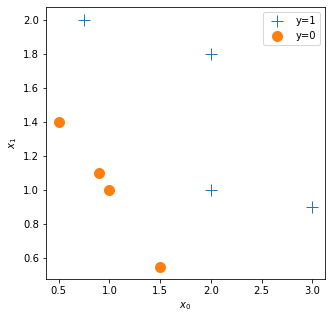

In [53]:
X_train = np.array([[0.5, 1.4], [1,1], [1.5, 0.55], [0.9, 1.1], [2, 1], [3, 0.9], [2, 1.8], [0.75, 2]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])

print (X_train.shape, y_train.shape)

ones = np.where(y_train == 1)
zeros = np.where(y_train == 0)

pos = X_train[ones]
neg = X_train[zeros]

fig = plt.figure(figsize = (5,5))
plt.plot(pos[:,0], pos[:,1], '+', ms=12, label=('y=1'))
plt.plot(neg[:,0], neg[:,1], 'o', ms=10, label=('y=0'))
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.legend()
plt.show()

From visualising the data we can get an idea of what the decision boundary should look like. Now we will set up a functions to calculate the cost using the sigmoid function.

In [41]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g

def cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    z = np.dot(X,w) + b
    f_wb = sigmoid(z)
    cost =  (1/m) * np.sum( -y*np.log(f_wb) - (1-y)*np.log(1-f_wb) )
             
    cost /= m
    
    return cost

In [42]:
w_test = np.array([1,1])
b_test = -3
cost(X_train, y_train, w_test, b_test)

0.054252441376898164

And now a function to calculate the gradient based on:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

In [50]:
def gradient(X, y, w, b): 

    m = X.shape[0]
    dj_dw = np.zeros((n,))                           

    z = np.dot(X,w) + b
    f_wb = sigmoid(z)          
                    
    dj_dw = (1/m) * np.dot(f_wb - y, X)
    dj_db = (1/m) * np.sum(f_wb - y)
                               
        
    return dj_db, dj_dw  

And now we're ready for gradient descent using:

$$\begin{align*}
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
\end{align*}$$

In [51]:
def gradient_descent(X, y, w_in, b_in, alpha, n): 

    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(n):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(n / 10) == 0:
            print(f"Iter {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

We are now ready to run gradient descent on our data.

In [52]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
n = 10000

w, b, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, n) 
print(f"\nupdated params: w:{w}, b:{b}")

Iter    0: Cost 0.08582715137017499   
Iter 1000: Cost 0.03189276819872226   
Iter 2000: Cost 0.0200214323864756   
Iter 3000: Cost 0.014639036293226902   
Iter 4000: Cost 0.011532268115977117   
Iter 5000: Cost 0.0095032229519182   
Iter 6000: Cost 0.008073499454908158   
Iter 7000: Cost 0.007012261889761931   
Iter 8000: Cost 0.006193875191441649   
Iter 9000: Cost 0.005543966013170465   

updated params: w:[5.70656948 7.04351575], b:-15.777159449122268


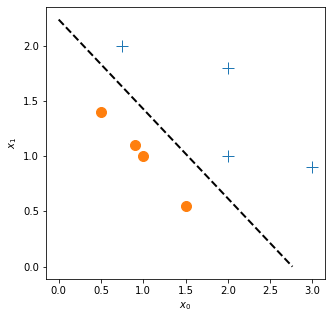

In [68]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

# Plot the data
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

ax.plot(pos[:,0], pos[:,1], '+', ms=12, label=('y=1'))
ax.plot(neg[:,0], neg[:,1], 'o', ms=10, label=('y=0'))

# Plot the decision boundary
x0 = -b/w[0]
x1 = -b/w[1]
ax.plot([0,x0],[x1,0], lw=2, ls='--', color='k')
plt.show()

In [ ]:
The decision bound